## Convolutional Neural Networks (CNNs)

#### CNNs are class of Deep Learning models primarily used for image processing tasks.
#### CNNs consist of multiple layers what work together to extract features from input images and make predictions.

In [2]:
# %pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

### Input layer

#### Is the 1st layer of CNN, responsible of receiving and preprocessing the raw image data.
#### It defines the dimensions of the input images, including height, width, and the number of color channels.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

##### Creating a sample input image

In [6]:
input_image = np. random. rand (28, 28, 1)

##### Displaying the input image

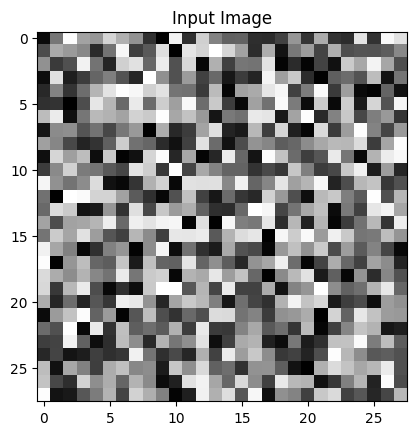

In [7]:
plt. imshow(input_image[:, :, 0], cmap='gray')
plt.title('Input Image')
plt. show( )

##### Defining the input layer

In [13]:
input_layer = np.random.rand(1, 28, 28, 1)

## Convolutional Layer

#### The convolutional layer is the core building block of CNNs.
#### It applies a set of learnable filters to the input, creating feature maps that highlight important features in the image.
#### Each filter slides across the input, performing element-wise multiplication and summing the results.

##### Creating a convolutional layer

In [14]:
conv_layer = layers.Conv2D(32, (3, 3), activation='relu')

##### Applying the convolutional layer to the input

In [15]:
feature_maps = conv_layer(input_layer)

##### Convert the KerasTensor to a NumPy array

In [16]:
feature_maps_np = feature_maps.numpy()

##### Visualizing a feature map


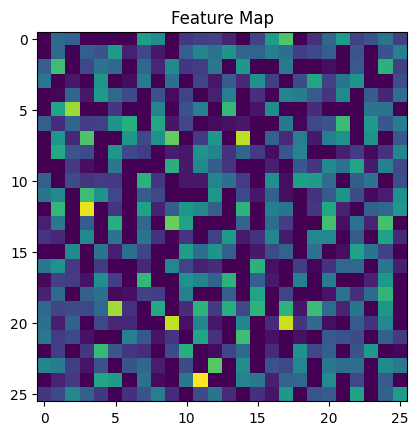

In [17]:
plt.imshow(feature_maps_np[0, :, :, 0], cmap='viridis')
plt.title('Feature Map')
plt.show()

## Activation Functions

#### Activation functions introduce non-linearity into the network, allowing it to learn complex patterns.
#### The Rectified Linear Unit (ReLU) is commonly used in CNNs, as it helps mitigate the vanishing gradient problem and speeds up training.

##### Implementing ReLU activation

In [18]:

def relu_activation(x):
    return tf.maximum(0, x)

##### Applying ReLU to sample data

In [19]:

sample_data = tf.constant([-2, -1, 0, 1, 2], dtype=tf.float32)
activated_data = relu_activation(sample_data)

print ("Input:", sample_data.numpy())
print ("After ReLU:", activated_data.numpy())

Input: [-2. -1.  0.  1.  2.]
After ReLU: [0. 0. 0. 1. 2.]


## Pooling Layer

#### Pooling layers reduce the spatial dimensions of the feature maps, decreasing computational complexity and helping to achieve spatial invariance.
#### Max pooling is the most common type, which selects the maximum value in each pooling window.

##### Creating a max pooling layer

In [20]:
pool_layer = layers.MaxPooling2D((2, 2))

#### Applying max pooling to the feature maps

In [21]:
pooled_features = pool_layer(feature_maps)

##### Visualizing a pooled feature map

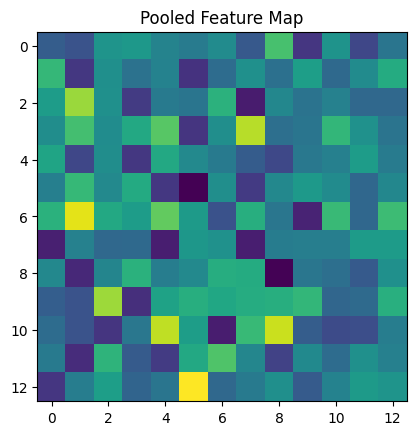

In [22]:
plt.imshow(pooled_features[0, :, :,0], cmap='viridis')
plt.title('Pooled Feature Map')
plt.show()

## Flattening Layer

#### The flattening layer transforms the 2D feature maps into a 1D vector, preparing the data for input into the fully connected layers.
#### This process preserves the information from the convolutional and pooling layers while changing the data structure.

##### Creating a flattening layer

In [23]:
flatten_layer = layers.Flatten()

##### Flattening the pooled features

In [24]:
flattened_features = flatten_layer(pooled_features)

print("Shape before flattening:", pooled_features.shape)
print("Shape after flattening:", flattened_features.shape)

Shape before flattening: (1, 13, 13, 32)
Shape after flattening: (1, 5408)


## Dense (Fully Connected) Layer

#### Fully connected layers take the flattened feature vector and perform high-level reasoning.
#### Each neuron in a dense layer is connected to every neuron in the previous layer, allowing the network to combine features and make complex decisions.

#### Creating a dense layer

In [25]:
dense_layer = layers.Dense(64, activation='relu')

#### Applying the dense layer to flattened features

In [26]:
dense_output = dense_layer(flattened_features)

print("Dense layer output shape: ", dense_output.shape)

Dense layer output shape:  (1, 64)


## Output Layer

#### The output layer produces the final predictions of the CNN.
#### For classification tasks, it typically uses the softmax activation function to generate a probability distribution over the possible

#### Creating an output layer for a 10-class classification problem

In [27]:
output_layer = layers.Dense(10, activation='softmax')

#### Generating predictions

In [28]:
predictions = output_layer(dense_output)

print("Predictions shape: ", predictions.shape)
print("Sample prediction: ", predictions[0].numpy())

Predictions shape:  (1, 10)
Sample prediction:  [0.11025923 0.10296758 0.09552985 0.10518525 0.09667984 0.10007548
 0.09645997 0.11865805 0.08364681 0.09053787]


## Putting It All Together

#### We'll create a simple CNN for image classification using the MNIST dataset.

#### Building a CNN for MNIST classification

In [30]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,818 (405.54 KB)

 Trainable params: 103,818 (405.54 KB)

 Non-trainable params: 0 (0.00 B)

## Training the CNN

#### Training a CNN involves feeding it labeled data, comparing its predictions to the true labels, and adjusting its weights to minimize the error.
#### We use backpropagation and gradient descent to optimize the network's parameters.

#### Loading and preprocessing the MNIST dataset

In [31]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

#### Reshape and normalize the images

In [32]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

#### Compiling and training the model

In [33]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy' ])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8435 - loss: 0.5340 - val_accuracy: 0.9718 - val_loss: 0.0944
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9718 - loss: 0.0910 - val_accuracy: 0.9736 - val_loss: 0.0882
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9793 - loss: 0.0664 - val_accuracy: 0.9808 - val_loss: 0.0648
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9843 - loss: 0.0503 - val_accuracy: 0.9837 - val_loss: 0.0536
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9858 - loss: 0.0408 - val_accuracy: 0.9832 - val_loss: 0.0550


## Evaluating the CNN

#### We evaluate the CNN's performance on a separate test set to assess its generalization capability.
#### We can also visualize the training process to detect issues like

#### Evaluating the model on the test set

In [34]:

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9850 - loss: 0.0490
Test accuracy: 0.9850


#### Plotting training history

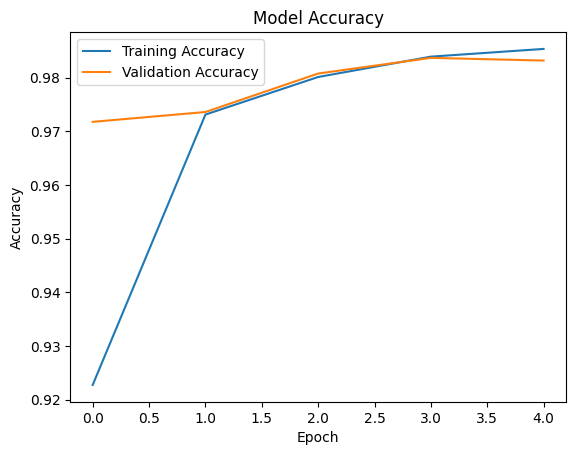

In [35]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Example: Image Classification

#### CNNs are widely used in image classification tasks.
#### Let's use our trained model to classify a handwritten digit from the MNIST

#### Select a random test image

In [36]:
test_image = test_images[np.random.randint(0, len(test_images))]

#### Make a prediction

In [37]:
prediction = model.predict(test_image.reshape(1, 28, 28, 1))
predicted_class = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


#### Display the image and prediction

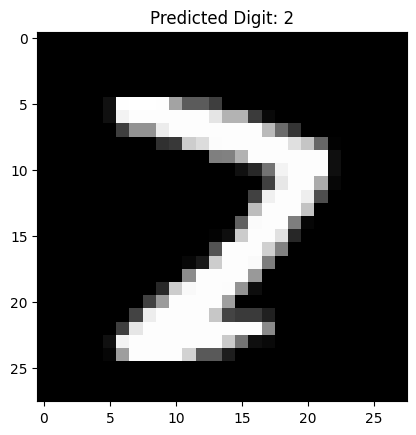

In [38]:
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_class}")
plt.show()

## Example: Feature Visualization

#### Let's visualize the features learned by the first convolutional layer of our model.

#### Get the weights of the first convolutional layer

In [44]:
first_layer_weights = model.layers[1].get_weights()[0]

#### Plot the learned filters

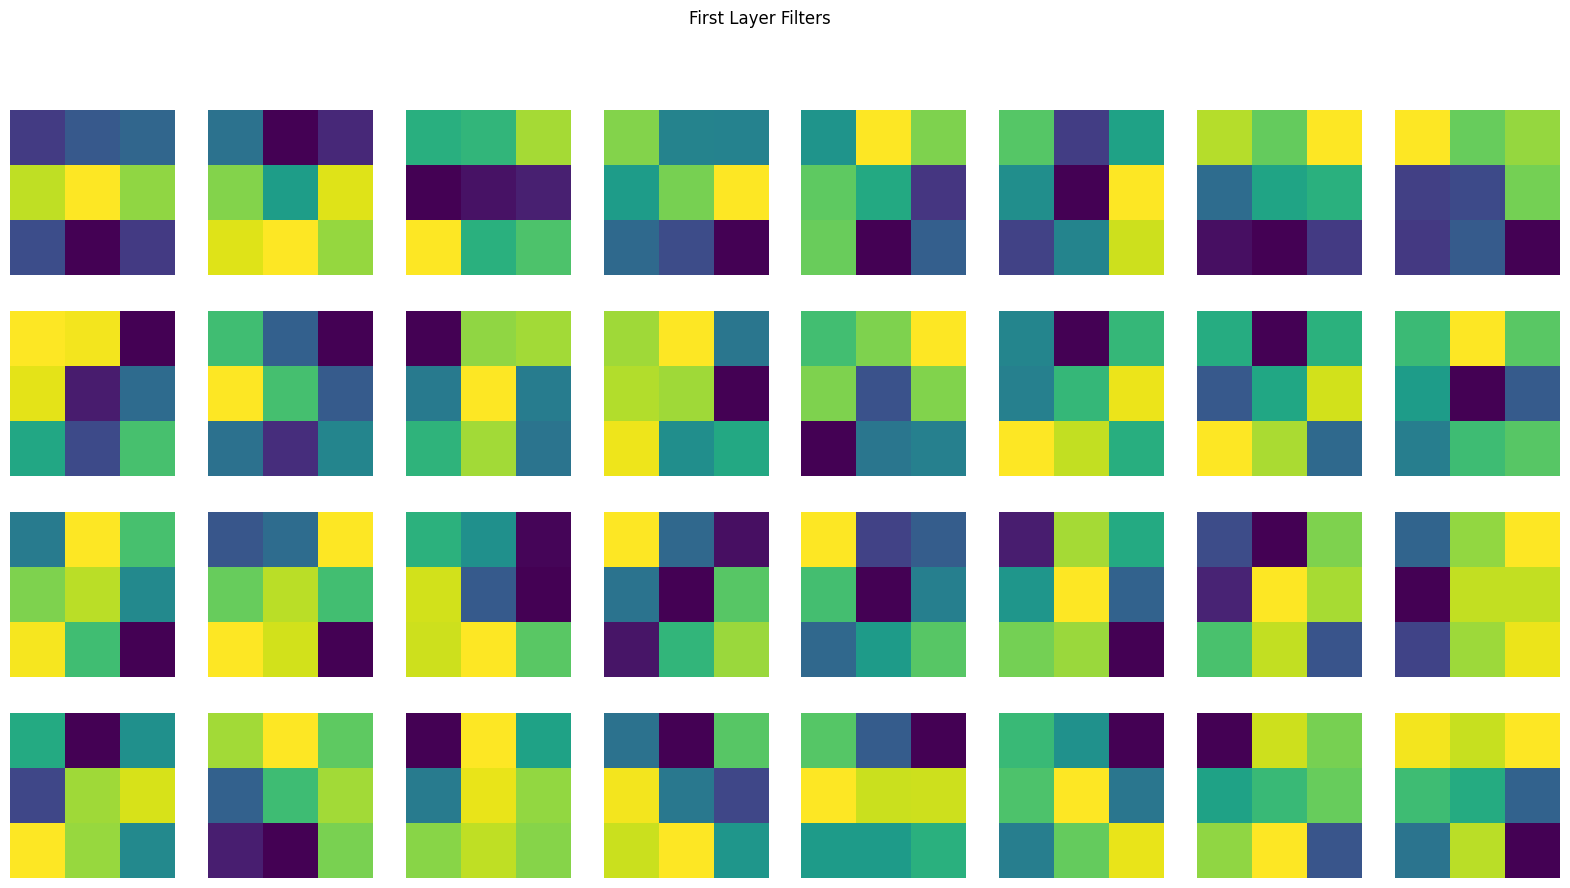

In [46]:
fig, axs = plt.subplots(4, 8, figsize=(20, 10))

for i in range(32):
    axs[i//8, i%8].imshow(first_layer_weights[:,:,0,i], cmap='viridis')
    axs[i//8, i%8].axis('off')

plt.suptitle("First Layer Filters")
plt.show()

## Example of ResNet: Introduced skip connections to allow training of very deep networks.

#### Example of ResNet: Introduced skip connections to allow training of very deep networks.

In [47]:

def residual_block(x, filters, kernel_size=3):
    y = layers.Conv2D(filters, kernel_size, padding='same')(x)
    y = layers.BatchNormalization()(y)
    y = layers.Activation('relu')(y)
    y = layers.Conv2D(filters, kernel_size, padding='same')(y)
    y = layers.BatchNormalization()(y)
    out = layers.Add()([x, y])
    return layers.Activation('relu')(out)


#### Using the residual block in a model

In [51]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = residual_block(x, 32)
outputs = layers.Dense(10, activation='softmax')(x)

resnet_model = models.Model(inputs, outputs)
resnet_model.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 26, 26,    │        320 │ input_layer_8[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 26, 26,    │      9,248 │ conv2d_19[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 26, 26,    │        128 │ conv2d_20[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 26, 26,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 26, 26,    │      9,248 │ activation_6[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 26, 26,    │        128 │ conv2d_21[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 26, 26,    │          0 │ conv2d_19[0][0],  │
│                     │ 32)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 26, 26,    │          0 │ add_3[0][0]       │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 26, 26,    │        330 │ activation_7[0][… │
│                     │ 10)               │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 19,402 (75.79 KB)

 Trainable params: 19,274 (75.29 KB)

 Non-trainable params: 128 (512.00 B)